<a href="https://colab.research.google.com/github/galigaribaldi/ClassRoom-Automatization/blob/main/Classroom_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DEMO Classroom
En el siguiente colab se describe la lógica de automatización de las calificaciones obtenidas directamente de Classroom  
**Importante:** Este demo sólo es estático ya que para poder ejecutarlo se debe subir los archivos de *credentials.json*

## Instalación de las librerías necesarias
Para poder usar la API de google necesitaremos teclear lso siguientes comandos en la terminal: 

```
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib
!pip install pandas
```



In [ ]:
!pip install --upgrade google-api-python-client google-auth-httplib2 google-auth-oauthlib

     |████████████████████████████████| 7.1MB 4.0MB/s 
Requirement already up-to-date: google-auth-oauthlib in /usr/local/lib/python3.7/dist-packages (0.4.4)
ERROR: earthengine-api 0.1.264 has requirement google-api-python-client<2,>=1.12.1, but you'll have google-api-python-client 2.4.0 which is incompatible.
  Found existing installation: google-auth-httplib2 0.0.4
    Uninstalling google-auth-httplib2-0.0.4:
      Successfully uninstalled google-auth-httplib2-0.0.4
  Found existing installation: google-api-python-client 1.12.8
    Uninstalling google-api-python-client-1.12.8:
      Successfully uninstalled google-api-python-client-1.12.8


## Código correspondiente a la función que retorna el token de servicio con las credenciales apropiadas
En caso de que este código marque error, se debe renovar las credenciales desde la consola de google Developer.  
[Consola de Developer Google](https://console.cloud.google.com/apis/credentials/oauthclient/428559247080-4rkpm3crei537ndi9qo0blvqoqv8co9k.apps.googleusercontent.com?authuser=1&project=coneyotlautomatico1). 
**Importante:** Para poder hacer uso de todo este código se necesita sacar los permisos necesarios y dar permiso a la plicación de hacer cambios a Classroom

In [ ]:
from __future__ import print_function
import os.path
from googleapiclient.discovery import build
from google_auth_oauthlib.flow import InstalledAppFlow
from google.auth.transport.requests import Request
from google.oauth2.credentials import Credentials

SCOPES = ['https://www.googleapis.com/auth/classroom.courses',
          'https://www.googleapis.com/auth/classroom.courses.readonly',
          'https://www.googleapis.com/auth/classroom.rosters',
          'https://www.googleapis.com/auth/classroom.rosters.readonly',
          'https://www.googleapis.com/auth/classroom.topics',
          'https://www.googleapis.com/auth/classroom.topics.readonly',
          'https://www.googleapis.com/auth/classroom.coursework.me',
          'https://www.googleapis.com/auth/classroom.coursework.students',
          #'https://www.googleapis.com/auth/classroom.coursework.students.readonly',
          'https://www.googleapis.com/auth/classroom.announcements',
          'https://www.googleapis.com/auth/classroom.announcements.readonly',
          'https://www.googleapis.com/auth/classroom.guardianlinks.students',
          'https://www.googleapis.com/auth/classroom.guardianlinks.students.readonly',
          'https://www.googleapis.com/auth/classroom.guardianlinks.me.readonly',
          'https://www.googleapis.com/auth/classroom.profile.emails',
          'https://www.googleapis.com/auth/classroom.push-notifications',
          'https://www.googleapis.com/auth/classroom.profile.photos'
          ]
def returns_service():
    """Shows basic usage of the Classroom API.
    Prints the names of the first 10 courses the user has access to.
    """
    creds = None
    # The file token.json stores the user's access and refresh tokens, and is
    # created automatically when the authorization flow completes for the first
    # time.
    if os.path.exists('token.json'):
        creds = Credentials.from_authorized_user_file('token.json', SCOPES)
    # If there are no (valid) credentials available, let the user log in.
    if not creds or not creds.valid:
        if creds and creds.expired and creds.refresh_token:
            creds.refresh(Request())
        else:
            flow = InstalledAppFlow.from_client_secrets_file(
                'credentials.json', SCOPES)
            creds = flow.run_local_server(port=0)
        # Save the credentials for the next run
        with open('token.json', 'w') as token:
            token.write(creds.to_json())

    service = build('classroom', 'v1', credentials=creds)
    return service
#c= returns_service()

## Código correspondiente a obtener todos los cursos disponibles en classroom y sus ID
Este código no recibe ningún dato como parametro, pero retorna un objeto de tipo dataframe con el nombre, el ID y la descripción de los cursos

In [ ]:
#from __future__ import print_function
from googleapiclient.discovery import build
from googleapiclient import errors
import os.path
import pickle
##Pandas
import pandas as pd
##Retorna Dataframe: id Curso, nombre Curso, Descripcion Curso
def get_all_courses():
    service = returns_service()
    results = service.courses().list(pageSize=20).execute()
    #courses = []
    cont = 0
    df = pd.DataFrame(columns=['ID_Curso', 'Nombre_Curso', 'Descripcion'], index=range(len(results['courses'])))
    for i in results['courses']:
        l = []
        l.append(i['id'])
        l.append(i['name'])
        l.append(i['descriptionHeading'])
        df.iloc[cont] = l
        cont = cont+1
    return df
cursos = get_all_courses()
print("Creacion de Diccionario para Manejar los cursos")
diccionario_Cursos = {
    "6to":cursos['ID_Curso'][1],
    "5to":cursos['ID_Curso'][2],
    "4to":cursos['ID_Curso'][3],
    "3ro":cursos['ID_Curso'][4],
    "2do":cursos['ID_Curso'][5],
    "1ro":cursos['ID_Curso'][6],
    "K3":cursos['ID_Curso'][7],
    "K2":cursos['ID_Curso'][8],
    "K1":cursos['ID_Curso'][9]
    }
print(diccionario_Cursos)
diccionario_Cursos
cursos

Creacion de Diccionario para Manejar los cursos
{'6to': '126383120623', '5to': '126382430066', '4to': '126382430048', '3ro': '126382430032', '2do': '126382430010', '1ro': '126382145238', 'K3': '126382145220', 'K2': '126380062908', 'K1': '126316206557'}


,ID_Curso,Nombre_Curso,Descripcion
0,283913077412,Curso Regularización Matemáticas,Curso Regularización Matemáticas Curso ExtraCu...
1,126383120623,Computación 6º,Computación 6º Materia ExtraCuricular
2,126382430066,Computación 5º,Computación 5º Materia Extracurricular
3,126382430048,Computación 4º,Computación 4º Materia Extracurricular
4,126382430032,Computación 3º,Computación 3º Materia Extracurricular
5,126382430010,Computación 2º,Computación 2º Materia ExtraCurricular
6,126382145238,Computación 1º,Computación 1º Materia Extracurricular
7,126382145220,Computación K3,Computación K3 Materia ExtraCurricular
8,126380062908,Computación K2,Computación K2 Materia Extracurricular
9,126316206557,Computación K1,Computación K1 Materia extracurricular


## Obtener los datos de los alumnos inscritos en cada curso
****
En este bloque de código se obtienen los datos de cada alumno:
* ID Alumno
* Nombre
* Email

**Esto es batsante necesario para generar los reportes, de aquí se puede rescatar el ID del alumno** 

In [ ]:
###Retorna Dataframe: ID, nombre, email
def get_users_by_idCourse(Courses_id):
    service = returns_service()
    results = service.courses().students().list(courseId=Courses_id)
    studentCourses =results.execute()
    df = pd.DataFrame(columns=['StudentID', 'Student_Name', 'EmailStudent'], index=range(len(studentCourses['students'])))
    cont = 0
    for i in studentCourses['students']:
        l = []
        #print(i['userId']);print(i['profile']['name']['fullName']);print(i['profile']['emailAddress'])
        try:
            l.append(i['userId'])
        except KeyError:
            l.append("NULL")
        try:
            l.append(i['profile']['name']['fullName'])
        except KeyError:
            l.append("NULL")
        try:
            l.append(i['profile']['emailAddress'])            
        except KeyError:
            l.append("NULL")
        df.iloc[cont] = l
        cont =cont+1
    return df

####
users = get_users_by_idCourse(diccionario_Cursos['4to'])
users

,StudentID,Student_Name,EmailStudent
0,118126515418870123466,Yacarem G.p,yacarempalma6@gmail.com
1,107021049480943581955,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
2,103590084106899362415,ubaldo benjamin morales espinosa,ubaldo.benja@gmail.com
3,103469333812346936368,melissa ferriz,melissaferriz.10@gmail.com
4,113195006635898568638,Diego Matamoros,diegomatamoros1sala@gmail.com
5,118199228344957331405,Yacarem Gp,yacaremgp@gmail.com
6,117323462163102293270,Regina Cruz,regina.cruzc01@gmail.com
7,115226854247716757204,Dante Rene Garibay Vazquez,dgaribayrv11@gmail.com
8,104465703345531742697,Brandon,bran.gael.13.m@gmail.com
9,109764709586462434899,ximena valentina,ximenavalentina597@gmail.com


## Código correspondiente a la lista de actividades dejadas
****
Este código permite traer todas las actividades pasándole como parámetro el *curso ID*, *Mes filtro* y *Año Filtro*.
retornanod un dataframe con los siguientes datos:
* **CourseWork ID:** Importante, ya que es el identificador para poder hacer joins con los demás dataFrames
* **Topic ID:** Identificador de la sección por tema separado en classrom, en este caos sólo consideramos 4 secciones.
  1.   Tareas
  2.   Asistencia
  3.   Examenes
  4.   Proyectos

* Titulo de la tarea: Titulo asignada desde classroom
* Descripcion: Descripción puesta en classroom sobre la actividad
* Fecha de creación: Fecha de creación asignada en la tarea
* Fecha de entrega: Fecha de entrega de la tarea, esta fecha es el filtro para conseguir las actividades
* Puntos Máximos: Puntuación de la tarea. 

**Hasta este punto no se consiguen los puntos obtenidos por el alumno, sólo la tarea tal cual**



In [ ]:
##Retorna Dataframe: Titulo, Descripcion, FechaCreacion, Maxpuntos,Fechaentrega
def courses_list_activities(course_id, mesFiltro, anioFiltro):
    service = returns_service()
    results = service.courses().courseWork().list(courseId=course_id).execute()
    list_activities = []
    df = pd.DataFrame(columns=['CourseWorkID', 'TopicId','Titulo', 'Descripcion','FechaCreacion','PuntosMaximos','FechaEntrega'], index=range(len(results['courseWork'])))
    cont = 0
    for i in results['courseWork']:
        l = []
        #print(i)
        ##print(i.keys())
        #input()
        try:
            if i['dueDate']['month'] >mesFiltro and i['dueDate']['year'] == anioFiltro:
                l.append(i['id'])
                try:
                    l.append(i['topicId'])
                except:
                    l.append("Sin Tema Asignado")                
                try:
                    l.append(i['title'])
                except:
                    l.append("Sin Titulo")
                try:
                    l.append(i['description'])
                except:
                    l.append("Sin decripcion")
                try:
                    l.append(i['creationTime'])
                except:
                    l.append("Sin hora")
                try:
                    l.append(i['maxPoints'])
                except KeyError:
                    l.append("Sin puntaje")
                try:
                    d = str(i['dueDate']['day']) + '/' +str(i['dueDate']['month']) +'/' +str(i['dueDate']['year'])
                    l.append(d)
                except KeyError:
                    l.append("Fecha")
                df.iloc[cont] = l
                cont = cont+1
        except KeyError:
            pass
    df = df.dropna()
    return df

activities = courses_list_activities(diccionario_Cursos['4to'],2,2021)
activities

,CourseWorkID,TopicId,Titulo,Descripcion,FechaCreacion,PuntosMaximos,FechaEntrega
0,347306900950,126488649113,Actividad 4 Scratch,Se debe adjuntar la liga del código correspond...,2021-05-20T18:47:20.032Z,100,29/5/2021
1,342716512745,126488649113,Tarea Scratch 3,Se debe adjuntar el link de la actividad 03 he...,2021-05-13T20:09:16.915Z,100,22/5/2021
2,339830337495,126488649113,Código 2 Scratch,Se debe adjuntar el link del código hecho en S...,2021-05-12T03:03:47.366Z,100,20/5/2021
3,338231352840,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021
4,334877660331,126488649113,Cuenta de Scratch y Código 1,Adjuntar el link de la actividad hecha en clas...,2021-05-04T16:02:17.976Z,100,8/5/2021
5,318888420409,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021
6,318425561669,241894073398,Proyecto Excel,Se deben de realizar las siguientes actividade...,2021-04-20T18:34:44.907Z,100,27/4/2021
7,316520079035,126488649113,Lista de Alumnos Finales,Subir el documento acabado el día 15/abril del...,2021-04-15T19:30:02.855Z,100,21/4/2021
8,315515991272,126488649113,"Lista de Alumnos con funciones ""Suma""",Se debe adjuntar el documento hecho en clase e...,2021-04-13T18:57:45.351Z,100,17/4/2021
9,306797286014,126488649113,Tabla con Gráficas,Se debe subir el libro hecho en clase el día 2...,2021-03-23T19:40:44.571Z,100,30/3/2021


## Código correspondiente a la entrega de trabajos por grupo
Este fragmento de código retorna un dataframe con los siguientes datos
* **CourseID:** Importante, ya que con este identificador se usará para crear los cruces (*Joins*) entre los demas Dataframes. **Este ID correspondee al ID del Curso**
* **CourseWorkID** Importante, ya que con este identificador se usará para crear los cruces (*Joins*) entre los demas Dataframes. **Este ID correspondee al ID de la Actividad**
* **StudentID** Importante, ya que con este identificador se usará para crear los cruces (*Joins*) entre los demas Dataframes. **Este ID correspondee al ID del Alumno**
* Fecha de Creación: Fecha de creación obtenidas directamente de classroom
* State:  Este estado se consigue directamente de classroom y quiere decir principalmente el estado en el que se encuentra cada tarea
    1. Returned: Trabajo calificado y retornado con la calificación correspondiente
    2. Turned In: Entregada pero no calificada
    3. Created: Tarea Creada peor no calificada
* Archivo de Entrega: Nombre del archivo de entrega
* Calificacion: Calificacion Obtenida, esta se pone directamente de Classroom

In [ ]:
def sumbiss_student_courseWork(course_id, course_work_id):
    service = returns_service()
    results = service.courses().courseWork().studentSubmissions().list(courseId=course_id, courseWorkId=course_work_id).execute()
    df = pd.DataFrame(columns=['CourseID', 'CourseWorkID', 'StudentID','FechaCreacion','State','ArchivoEntrega','Calificacion'], index=range(len(results['studentSubmissions'])))
    cont = 0
    for i in results['studentSubmissions']:
        l = []
        #print(i)
        #input()
        try:
            l.append(i["courseId"]);l.append(i["courseWorkId"])
        except:
            l.append("NULL")
        try:
            l.append(i["userId"]);l.append(i["creationTime"])
        except:
            l.append("NULL")
        try:
            l.append(i["state"])
        except:
            l.append("NULL")
        try:
            l.append(i["assignmentSubmission"]['attachments'][0]['driveFile']['title'])
        except:
            l.append("NULL")
        try:
            l.append(int(i["draftGrade"])/10)
        except:
            l.append(0)
        df.iloc[cont] = l
        cont = cont+1
    return df

sumbiss_student_courseWork(diccionario_Cursos['4to'], activities['CourseWorkID'][1])

,CourseID,CourseWorkID,StudentID,FechaCreacion,State,ArchivoEntrega,Calificacion
0,126382430048,342716512745,107021049480943581955,2021-05-13T20:17:31.271Z,TURNED_IN,NULL,0
1,126382430048,342716512745,118199228344957331405,2021-05-13T20:18:03.131Z,CREATED,NULL,0
2,126382430048,342716512745,109764709586462434899,2021-05-13T20:18:39.231Z,TURNED_IN,20210514_153449.png,0
3,126382430048,342716512745,108736832238678377904,2021-05-13T20:18:41.861Z,CREATED,NULL,0
4,126382430048,342716512745,115226854247716757204,2021-05-13T20:18:03.124Z,TURNED_IN,NULL,0
5,126382430048,342716512745,115366587804340534202,2021-05-13T20:18:55.823Z,CREATED,NULL,0
6,126382430048,342716512745,117323462163102293270,2021-05-13T20:18:12.934Z,TURNED_IN,NULL,0
7,126382430048,342716512745,108669578458132653122,2021-05-13T20:18:36.191Z,CREATED,NULL,0
8,126382430048,342716512745,118126515418870123466,2021-05-13T20:17:22.260Z,TURNED_IN,NULL,0
9,126382430048,342716512745,103590084106899362415,2021-05-13T20:17:37.556Z,CREATED,NULL,0


## Código que retorna Los temas generados en classroom
Este código devuelve un datafram con todas las secciones/temas disponbiles en classroom.  

**Importante: Para este código solo se consideran 4 temas (Tareas, Examenes, asistencia, Proyectos)**

In [ ]:
##Retorna un DF con El curso ID, el nombre del tema y la fecha de creacion
def return_all_themes(course_id):
    service = returns_service()
    results = service.courses().topics().list(courseId=course_id).execute()    
    df = pd.DataFrame(columns=['CourseId', 'TopicId', 'name','UpdateTime'], index=range(len(results['topic'])))
    cont = 0
    for i in results['topic']:
        l = []
        try:
            l.append(i["courseId"]);l.append(i["topicId"])
        except:
            l.append("NULL")
        try:
            l.append(i["name"])
        except:
            l.append("NULL")
        try:
            l.append(i["updateTime"])
        except:
            l.append("NULL")
        df.iloc[cont] = l
        cont = cont+1
    df = df[df.name != 'Material']
    df = df[df.name != 'Materiales']
    return df
temas_id = return_all_themes(diccionario_Cursos['4to'])
temas_id

,CourseId,TopicId,name,UpdateTime
0,126382430048,338231352825,Asistencia,2021-05-07T04:34:05.539Z
1,126382430048,241894073398,Proyectos,2021-04-20T18:37:19.562Z
2,126382430048,198747299620,Examenes,2021-04-21T17:44:36.271Z
3,126382430048,126488649113,Tarea,2021-05-20T18:50:00.798Z


In [ ]:
def return_themes_by_name(course_id,names):
    service = returns_service()
    results = service.courses().topics().list(courseId=course_id).execute()    
    df = pd.DataFrame(columns=['CourseId', 'TopicId', 'name','UpdateTime'], index=range(len(results['topic'])))
    cont = 0
    for i in results['topic']:
        l = []
        try:
            l.append(i["courseId"]);l.append(i["topicId"])
        except:
            l.append("NULL")
        try:
            l.append(i["name"])
        except:
            l.append("NULL")
        try:
            l.append(i["updateTime"])
        except:
            l.append("NULL")
        df.iloc[cont] = l
        cont = cont+1
    df = df[df.name == names]
    return df
return_themes_by_name(diccionario_Cursos['4to'],'Tarea')

,CourseId,TopicId,name,UpdateTime
3,126382430048,126488649113,Tarea,2021-05-20T18:50:00.798Z


## Generación de Archivos complejos
En esta sección se utilizará la operación de *JOIN*, la cual nos permite combinar 2 dataframes combinados anteriormente:
* Dataframe Users: Este dataframe contiene los datos de los alumnos
* Dataframe Lista de Actividades: Este dataframe contiene los datos de las actividades realizadas en classroom
* **USO DE JOINS:** Para hacer el uso de Join, se necesita un dato en común, para ello se usa:  
    1. La clave del alumno (*StudentID*)
    2. Identificador del Curso (*Curso ID*)
    3. Identificador de la actividad (*CourseWork_ID*)
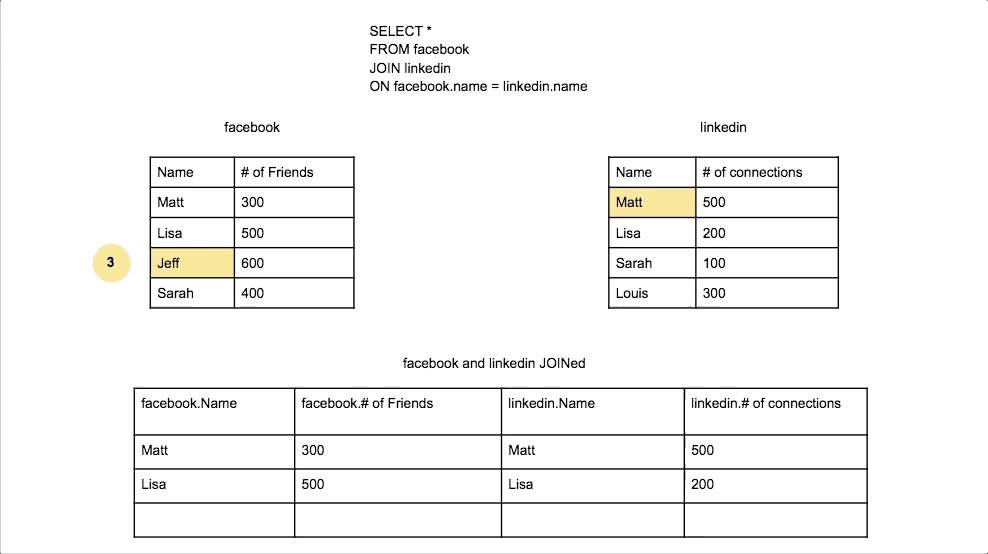


In [ ]:
def resumen_Actividades(mes,anio, Grado):
    d = courses_list_activities(Grado, mes,anio)
    users = get_users_by_idCourse(Grado)
    Final = pd.DataFrame()
    for i in d['CourseWorkID']:
        actividades = sumbiss_student_courseWork(Grado,i)
        Final = pd.concat([actividades, Final])
        #Final = pd.merge(left=d, right=actividades, left_on='CourseWorkID', right_on='CourseWorkID')
    Final2 = pd.merge(left=Final, right=d, left_on='CourseWorkID', right_on='CourseWorkID')
    Final3 = pd.merge(left=Final2, right=users, left_on='StudentID', right_on='StudentID')
    return Final3
resumen = resumen_Actividades(2,2021,diccionario_Cursos['4to'])
resumen

,CourseID,CourseWorkID,StudentID,FechaCreacion_x,State,ArchivoEntrega,Calificacion,TopicId,Titulo,Descripcion,FechaCreacion_y,PuntosMaximos,FechaEntrega,Student_Name,EmailStudent
0,126382430048,277945028958,107021049480943581955,2021-02-23T17:21:50.163Z,RETURNED,Proyecto Compu.mp4,10,241894073398,Proyecto ShotCut,"Se debe entregar el video en formato "".mp4"". P...",2021-02-23T17:11:17.611Z,100,8/3/2021,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
1,126382430048,292847725503,107021049480943581955,2021-03-04T19:24:15.995Z,RETURNED,Tabla 1.xlsx,10,126488649113,Tarea Tabla 1,"Adjuntar la tabla creada el día 4/Marzo/2021, ...",2021-03-04T19:19:21.312Z,100,13/3/2021,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
2,126382430048,292847725457,107021049480943581955,2021-03-04T19:19:18.262Z,RETURNED,Libro1.xlsx,10,126488649113,Hoja de Cálculo con nombre,Se debe adjuntar la hoja de cálculo hecha el d...,2021-03-04T19:18:29.731Z,100,13/3/2021,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
3,126382430048,297882289077,107021049480943581955,2021-03-11T19:22:00.953Z,RETURNED,TABLA 1 CON FORMATO.xlsx,10,126488649113,Tabla con formato,Se debe subir el documento de Excel hecho en c...,2021-03-11T19:15:45.408Z,100,20/3/2021,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
4,126382430048,300116679106,107021049480943581955,2021-03-17T17:56:16.841Z,RETURNED,Graficas Barras.xlsx,10,126488649113,Gráfica Sencilla,Se debe adjuntar el trabajo del día 16/Marzo/2...,2021-03-17T17:54:54.763Z,100,24/3/2021,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,126382430048,334877660331,113195006635898568638,2021-05-04T18:14:34.275Z,CREATED,NULL,0,126488649113,Cuenta de Scratch y Código 1,Adjuntar el link de la actividad hecha en clas...,2021-05-04T16:02:17.976Z,100,8/5/2021,Diego Matamoros,diegomatamoros1sala@gmail.com
204,126382430048,338231352840,113195006635898568638,2021-05-07T04:34:44.926Z,RETURNED,NULL,10,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,Diego Matamoros,diegomatamoros1sala@gmail.com
205,126382430048,339830337495,113195006635898568638,2021-05-12T03:10:12.251Z,CREATED,NULL,0,126488649113,Código 2 Scratch,Se debe adjuntar el link del código hecho en S...,2021-05-12T03:03:47.366Z,100,20/5/2021,Diego Matamoros,diegomatamoros1sala@gmail.com
206,126382430048,342716512745,113195006635898568638,2021-05-13T20:17:43.198Z,CREATED,NULL,0,126488649113,Tarea Scratch 3,Se debe adjuntar el link de la actividad 03 he...,2021-05-13T20:09:16.915Z,100,22/5/2021,Diego Matamoros,diegomatamoros1sala@gmail.com


## Generación de Dataframe respecto a tipo de actividad
Para este dataframe se hace de nuevo un *JOIN*, con 2 dataframes, los cuales son:
* Lista de Actividades: Datafram anteriormente explicado, en el cual se le pasa por filtro los meses
* Temas - Topic: Dataframe con sus ID

**Importante:** El ID que se usa como Filtro es el ID del tema, el cual se filtra por la actividad

In [ ]:
def resumen_Actividades_tipo(mes,anio, Grado,tipo_actividad):
    n = courses_list_activities(Grado, mes,anio)
    act = return_themes_by_name(Grado, tipo_actividad)
    d = pd.merge(left=n, right=act, left_on='TopicId', right_on='TopicId')
    #input()
    users = get_users_by_idCourse(Grado)
    Final = pd.DataFrame()
    for i in d['CourseWorkID']:
        actividades = sumbiss_student_courseWork(Grado,i)
        Final = pd.concat([actividades, Final])
        #Final = pd.merge(left=d, right=actividades, left_on='CourseWorkID', right_on='CourseWorkID')
    Final2 = pd.merge(left=Final, right=d, left_on='CourseWorkID', right_on='CourseWorkID')
    Final3 = pd.merge(left=Final2, right=users, left_on='StudentID', right_on='StudentID')
    return Final3
  
def resumen_Total_tipo(mes,anio, Grado, GradoStr):
    ###Primera parte
    allThemes = return_all_themes(Grado)
    with pd.ExcelWriter(GradoStr+"_Resumen"+'.xlsx') as writer:
        for i in allThemes['name']:
            Resumen = pd.DataFrame()
            print(i)
            data = resumen_Actividades_tipo(mes,anio, Grado,i)
            data.to_excel(writer,sheet_name=i)
    #####Segunda parte
    #input("Segunda parte")
    ###Leer el Dataframe
    datosProyectos = pd.read_excel(GradoStr+"_Resumen"+".xlsx",sheet_name="Proyectos")
    datosExamenes = pd.read_excel(GradoStr+"_Resumen"+".xlsx",sheet_name="Examenes")
    datosTarea = pd.read_excel(GradoStr+"_Resumen"+".xlsx",sheet_name="Tarea")
    datosAsistencia = pd.read_excel(GradoStr+"_Resumen"+".xlsx",sheet_name="Asistencia")
    ### Usuarios
    users = get_users_by_idCourse(Grado)
    ###Generar Resumen
    DataframeFinal = pd.DataFrame(columns=['StudentID', 'Nombre Alumno', 'Proyecto','Examenes','Tareas','Asistencia', 'Promedio Final'], index=range(len(users['StudentID'])))
    cont=0
    for i in range(len(users['StudentID'])):
        l=[]
        ########Leyendo y Filtrando Dataframes
        proyectos = datosProyectos[datosProyectos.StudentID == users['StudentID'][i]]
        examenes = datosExamenes[datosExamenes.StudentID == users['StudentID'][i]]
        Tarea = datosTarea[datosTarea.StudentID == users['StudentID'][i]]
        asistencia = datosAsistencia[datosAsistencia.StudentID == users['StudentID'][i]]
        ##Agregando valores Generales
        l.append(users['StudentID'][i]); l.append(users['Student_Name'][i])
        ###Proyecto (2)
        l.append(proyectos['Calificacion'].mean())
        ###Examenes (3)
        l.append(examenes['Calificacion'].mean())
        ###Tareas (4)
        l.append(round(Tarea['Calificacion'].mean(),2))
        ###Asistencia (5)
        l.append(asistencia['Calificacion'].mean())
        ###PromedioFinal
        PF = (l[2]*.5)+(l[3]*.2)+(l[4]*.15)+(l[5]*.15)
        l.append(round(PF,2))
        ###
        DataframeFinal.iloc[cont] = l
        cont = cont+1
    with pd.ExcelWriter(GradoStr+"_Resumen"+'.xlsx') as writer:
        ###
        datosProyectos.drop(datosProyectos.filter(regex="Unnamed"),axis=1, inplace=True)
        datosProyectos.to_excel(writer,sheet_name="Proyectos")
        ###
        datosExamenes.drop(datosExamenes.filter(regex="Unnamed"),axis=1, inplace=True)
        datosExamenes.to_excel(writer,sheet_name="Examenes")
        ###
        datosTarea.drop(datosTarea.filter(regex="Unnamed"),axis=1, inplace=True)
        datosTarea.to_excel(writer,sheet_name="Tarea")
        ###
        datosAsistencia.drop(datosAsistencia.filter(regex="Unnamed"),axis=1, inplace=True)
        datosAsistencia.to_excel(writer,sheet_name="Asistencia")
        ###
        DataframeFinal.to_excel(writer,sheet_name="Resumen")
Clave = '4to'
###Generacion del resumen total
resumen_Total = resumen_Total_tipo(1,2021,diccionario_Cursos['4to'],Clave)

Asistencia
Proyectos
Examenes
Tarea


##Abrir y mostrar los Dataframes
****
###Dataframe Resumen
Dataframe correspondiente al resumen de sus actividades, este conlleva una lista con:
* ID Classroom
* Nombre Alumno:
* Proyecto
* Examenes
* Tareas
* Assitencia
* **Promedio Final:** Este ultimo se obtiene con el porcentaje anteriormente descrito

In [ ]:
###Datafram de Resumen
DatosResumen= pd.read_excel(Clave+'_Resumen.xlsx', sheet_name='Resumen', index_col=0)
DatosResumen

,StudentID,Nombre Alumno,Proyecto,Examenes,Tareas,Asistencia,Promedio Final
0,118126515418870123466,Yacarem G.p,8.5,7.5,7.94,9.3,8.34
1,107021049480943581955,Diego Mauricio Bernal Pomposo,9.5,9.0,7.94,10.0,9.24
2,103590084106899362415,ubaldo benjamin morales espinosa,0.0,0.0,0.00,2.3,0.34
3,103469333812346936368,melissa ferriz,10.0,9.0,5.59,10.0,9.14
4,113195006635898568638,Diego Matamoros,3.5,8.5,0.53,10.0,5.03
5,118199228344957331405,Yacarem Gp,0.0,0.0,0.00,9.3,1.40
6,117323462163102293270,Regina Cruz,10.5,9.0,7.65,10.0,9.70
7,115226854247716757204,Dante Rene Garibay Vazquez,10.0,9.0,7.65,10.0,9.45
8,104465703345531742697,Brandon,10.0,8.5,7.65,9.3,9.24
9,109764709586462434899,ximena valentina,0.0,8.5,2.94,7.7,3.30


In [ ]:
###Dataframe Tareas
DatosTarea = pd.read_excel(Clave+'_Resumen.xlsx', sheet_name='Tarea', index_col=0)
DatosTarea

,CourseID,CourseWorkID,StudentID,FechaCreacion_x,State,ArchivoEntrega,Calificacion,TopicId,Titulo,Descripcion,FechaCreacion_y,PuntosMaximos,FechaEntrega,CourseId,name,UpdateTime,Student_Name,EmailStudent
0,126382430048,247768621320,107021049480943581955,2021-01-28T20:42:46.397Z,RETURNED,Proyecto 7.mp4,10,126488649113,Video con Música y filtros,"Se debe subir el video en formato ""mp4"" del vi...",2021-01-28T20:39:13.318Z,100,1/2/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
1,126382430048,273864564854,107021049480943581955,2021-02-11T20:53:55.564Z,RETURNED,Ptroyecto 9.mp4,10,126488649113,ShotCut Video,Se debe subir el video hecho en clase el día 1...,2021-02-11T19:01:20.659Z,100,17/2/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
2,126382430048,275239992324,107021049480943581955,2021-02-16T19:01:07.243Z,RETURNED,Proyecto 10.mp4,10,126488649113,Video Rey Aplaudiendo - Pen Pineapple Pen,Se debe subir el video editado sobre la clase ...,2021-02-16T18:53:04.825Z,100,20/2/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
3,126382430048,276179304421,107021049480943581955,2021-02-18T19:40:28.223Z,RETURNED,Proyecto 12.mp4,10,126488649113,Edición de Video Rana,"Se debe subir el video editado sobre ""Nadie te...",2021-02-18T19:37:53.627Z,100,24/2/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
4,126382430048,266702150743,107021049480943581955,2021-02-04T19:26:33.267Z,RETURNED,Proyecto 8.mp4,10,126488649113,Video Edición de imágenes - Música,Se debe subir el video hecho en clase el día 0...,2021-02-04T19:23:42.001Z,100,10/2/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,126382430048,316520079035,113195006635898568638,2021-04-15T19:33:32.706Z,RETURNED,lista de alumnos.xlsx,9,126488649113,Lista de Alumnos Finales,Subir el documento acabado el día 15/abril del...,2021-04-15T19:30:02.855Z,100,21/4/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Matamoros,diegomatamoros1sala@gmail.com
217,126382430048,334877660331,113195006635898568638,2021-05-04T18:14:34.275Z,CREATED,NaN,0,126488649113,Cuenta de Scratch y Código 1,Adjuntar el link de la actividad hecha en clas...,2021-05-04T16:02:17.976Z,100,8/5/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Matamoros,diegomatamoros1sala@gmail.com
218,126382430048,339830337495,113195006635898568638,2021-05-12T03:10:12.251Z,CREATED,NaN,0,126488649113,Código 2 Scratch,Se debe adjuntar el link del código hecho en S...,2021-05-12T03:03:47.366Z,100,20/5/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Matamoros,diegomatamoros1sala@gmail.com
219,126382430048,342716512745,113195006635898568638,2021-05-13T20:17:43.198Z,CREATED,NaN,0,126488649113,Tarea Scratch 3,Se debe adjuntar el link de la actividad 03 he...,2021-05-13T20:09:16.915Z,100,22/5/2021,126382430048,Tarea,2021-05-20T18:50:00.798Z,Diego Matamoros,diegomatamoros1sala@gmail.com


In [ ]:
###Dataframe Examenes
DatosExamen = pd.read_excel(Clave+'_Resumen.xlsx', sheet_name='Examenes', index_col=0)
DatosExamen

,CourseID,CourseWorkID,StudentID,FechaCreacion_x,State,ArchivoEntrega,Calificacion,TopicId,Titulo,Descripcion,FechaCreacion_y,PuntosMaximos,FechaEntrega,CourseId,name,UpdateTime,Student_Name,EmailStudent
0,126382430048,318888420409,107021049480943581955,2021-04-22T17:04:44.066Z,RETURNED,NaN,9.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
1,126382430048,318888420409,118199228344957331405,2021-04-22T17:05:19.081Z,RETURNED,NaN,0.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Yacarem Gp,yacaremgp@gmail.com
2,126382430048,318888420409,109764709586462434899,2021-04-22T17:05:29.111Z,RETURNED,NaN,8.5,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,ximena valentina,ximenavalentina597@gmail.com
3,126382430048,318888420409,108736832238678377904,2021-04-22T17:05:59.890Z,RETURNED,NaN,0.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Yacarem Guillén palma,guillenpalmayacarem@gmail.com
4,126382430048,318888420409,115226854247716757204,2021-04-22T17:05:35.993Z,RETURNED,NaN,9.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Dante Rene Garibay Vazquez,dgaribayrv11@gmail.com
5,126382430048,318888420409,115366587804340534202,2021-04-22T17:06:00.705Z,RETURNED,NaN,6.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Noe Emiliano Noriega,noeemiliano1011@gmail.com
6,126382430048,318888420409,117323462163102293270,2021-04-22T17:05:25.096Z,RETURNED,NaN,9.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Regina Cruz,regina.cruzc01@gmail.com
7,126382430048,318888420409,108669578458132653122,2021-04-22T17:06:10.903Z,RETURNED,NaN,8.5,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Tadeo Flores,tadeo.flores1112@gmail.com
8,126382430048,318888420409,118126515418870123466,2021-04-22T17:04:38.744Z,RETURNED,NaN,7.5,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,Yacarem G.p,yacarempalma6@gmail.com
9,126382430048,318888420409,103590084106899362415,2021-04-22T17:04:58.290Z,RETURNED,NaN,0.0,198747299620,Examen Excel,Examen virtual sobre Excel,2021-04-21T17:44:36.273Z,100,23/4/2021,126382430048,Examenes,2021-04-21T17:44:36.271Z,ubaldo benjamin morales espinosa,ubaldo.benja@gmail.com


In [ ]:
###Dataframe Proyectos
DatosProyectos = pd.read_excel(Clave+'_Resumen.xlsx', sheet_name='Proyectos', index_col=0)
DatosProyectos

,CourseID,CourseWorkID,StudentID,FechaCreacion_x,State,ArchivoEntrega,Calificacion,TopicId,Titulo,Descripcion,FechaCreacion_y,PuntosMaximos,FechaEntrega,CourseId,name,UpdateTime,Student_Name,EmailStudent
0,126382430048,277945028958,107021049480943581955,2021-02-23T17:21:50.163Z,RETURNED,Proyecto Compu.mp4,10,241894073398,Proyecto ShotCut,"Se debe entregar el video en formato "".mp4"". P...",2021-02-23T17:11:17.611Z,100,8/3/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
1,126382430048,318425561669,107021049480943581955,2021-04-20T18:42:13.398Z,RETURNED,Proyecto exel Computación.xlsx,9,241894073398,Proyecto Excel,Se deben de realizar las siguientes actividade...,2021-04-20T18:34:44.907Z,100,27/4/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
2,126382430048,277945028958,118199228344957331405,2021-02-23T17:22:21.777Z,RETURNED,NaN,0,241894073398,Proyecto ShotCut,"Se debe entregar el video en formato "".mp4"". P...",2021-02-23T17:11:17.611Z,100,8/3/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Yacarem Gp,yacaremgp@gmail.com
3,126382430048,318425561669,118199228344957331405,2021-04-20T18:42:51.808Z,RETURNED,NaN,0,241894073398,Proyecto Excel,Se deben de realizar las siguientes actividade...,2021-04-20T18:34:44.907Z,100,27/4/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Yacarem Gp,yacaremgp@gmail.com
4,126382430048,277945028958,109764709586462434899,2021-02-23T17:22:34.182Z,RETURNED,NaN,0,241894073398,Proyecto ShotCut,"Se debe entregar el video en formato "".mp4"". P...",2021-02-23T17:11:17.611Z,100,8/3/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,ximena valentina,ximenavalentina597@gmail.com
5,126382430048,318425561669,109764709586462434899,2021-04-20T18:42:53.557Z,RETURNED,NaN,0,241894073398,Proyecto Excel,Se deben de realizar las siguientes actividade...,2021-04-20T18:34:44.907Z,100,27/4/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,ximena valentina,ximenavalentina597@gmail.com
6,126382430048,277945028958,108736832238678377904,2021-02-23T17:22:51.068Z,RETURNED,NaN,0,241894073398,Proyecto ShotCut,"Se debe entregar el video en formato "".mp4"". P...",2021-02-23T17:11:17.611Z,100,8/3/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Yacarem Guillén palma,guillenpalmayacarem@gmail.com
7,126382430048,318425561669,108736832238678377904,2021-04-20T18:42:54.921Z,RETURNED,NaN,0,241894073398,Proyecto Excel,Se deben de realizar las siguientes actividade...,2021-04-20T18:34:44.907Z,100,27/4/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Yacarem Guillén palma,guillenpalmayacarem@gmail.com
8,126382430048,277945028958,115226854247716757204,2021-02-23T17:22:51.377Z,RETURNED,Proyecto shotcut Dante R.mp4,10,241894073398,Proyecto ShotCut,"Se debe entregar el video en formato "".mp4"". P...",2021-02-23T17:11:17.611Z,100,8/3/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Dante Rene Garibay Vazquez,dgaribayrv11@gmail.com
9,126382430048,318425561669,115226854247716757204,2021-04-20T18:42:51.793Z,RETURNED,Proyecto_Excell_Dante Rene.xlsx,10,241894073398,Proyecto Excel,Se deben de realizar las siguientes actividade...,2021-04-20T18:34:44.907Z,100,27/4/2021,126382430048,Proyectos,2021-04-20T18:37:19.562Z,Dante Rene Garibay Vazquez,dgaribayrv11@gmail.com


In [ ]:
###Dataframe Asistencia
DatosAsistencia = pd.read_excel(Clave+'_Resumen.xlsx', sheet_name='Asistencia', index_col=0)
DatosAsistencia

,CourseID,CourseWorkID,StudentID,FechaCreacion_x,State,ArchivoEntrega,Calificacion,TopicId,Titulo,Descripcion,FechaCreacion_y,PuntosMaximos,FechaEntrega,CourseId,name,UpdateTime,Student_Name,EmailStudent
0,126382430048,338231352840,107021049480943581955,2021-05-07T04:34:17.454Z,RETURNED,NaN,10.0,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Diego Mauricio Bernal Pomposo,diegomauribernal@gmail.com
1,126382430048,338231352840,118199228344957331405,2021-05-07T04:34:45.724Z,RETURNED,NaN,9.3,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Yacarem Gp,yacaremgp@gmail.com
2,126382430048,338231352840,109764709586462434899,2021-05-07T04:35:13.479Z,RETURNED,NaN,7.7,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,ximena valentina,ximenavalentina597@gmail.com
3,126382430048,338231352840,108736832238678377904,2021-05-07T04:35:03.616Z,RETURNED,NaN,9.3,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Yacarem Guillén palma,guillenpalmayacarem@gmail.com
4,126382430048,338231352840,115226854247716757204,2021-05-07T04:35:15.647Z,RETURNED,NaN,10.0,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Dante Rene Garibay Vazquez,dgaribayrv11@gmail.com
5,126382430048,338231352840,115366587804340534202,2021-05-07T04:35:50.719Z,RETURNED,NaN,9.3,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Noe Emiliano Noriega,noeemiliano1011@gmail.com
6,126382430048,338231352840,117323462163102293270,2021-05-07T04:34:43.001Z,RETURNED,NaN,10.0,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Regina Cruz,regina.cruzc01@gmail.com
7,126382430048,338231352840,108669578458132653122,2021-05-07T04:35:33.413Z,RETURNED,NaN,8.5,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Tadeo Flores,tadeo.flores1112@gmail.com
8,126382430048,338231352840,118126515418870123466,2021-05-07T04:34:11.234Z,RETURNED,NaN,9.3,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,Yacarem G.p,yacarempalma6@gmail.com
9,126382430048,338231352840,103590084106899362415,2021-05-07T04:34:25.684Z,RETURNED,NaN,2.3,338231352825,Asistencia B3,Asistencia Para el periodo B3,2021-05-07T04:33:36.545Z,100,2/5/2021,126382430048,Asistencia,2021-05-07T04:34:05.539Z,ubaldo benjamin morales espinosa,ubaldo.benja@gmail.com


In [ ]:
import matplotlib.pyplot as plt
from matplotlib import table
Datos = DatosResumen.copy()
Datos.index = Datos['Nombre Alumno'].str[0:5]

In [ ]:
####Tabla
df = Datos.iloc[:, 2:7]
df

,Proyecto,Examenes,Tareas,Asistencia,Promedio Final
Nombre Alumno,,,,,
Yacar,8.5,7.5,7.94,9.3,8.34
Diego,9.5,9.0,7.94,10.0,9.24
ubald,0.0,0.0,0.00,2.3,0.34
melis,10.0,9.0,5.59,10.0,9.14
Diego,3.5,8.5,0.53,10.0,5.03
Yacar,0.0,0.0,0.00,9.3,1.40
Regin,10.5,9.0,7.65,10.0,9.70
Dante,10.0,9.0,7.65,10.0,9.45
Brand,10.0,8.5,7.65,9.3,9.24


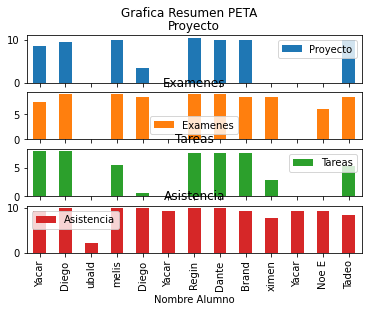

In [ ]:
###GRafica de barras 1
g1 = Datos.iloc[:, 2:6].plot.bar(subplots=True, title="Grafica Resumen PETA")
fig = g1[1].get_figure()
#fig.savefig('SalidaIMG/grafica1.png')

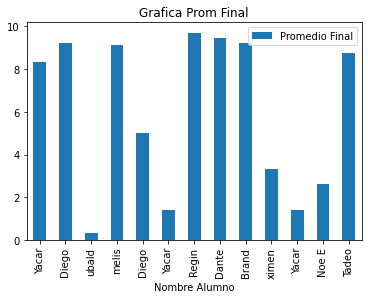

In [ ]:
g2 = Datos.iloc[:, 6:7].plot.bar(title="Grafica Prom Final")
fig = g2.get_figure()

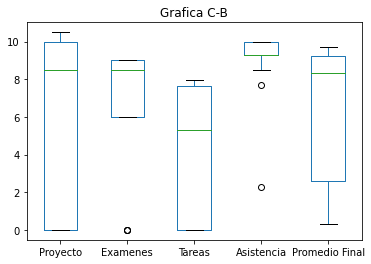

In [ ]:
###Grafica Caja Bigotes
g3 = Datos.plot.box(title="Grafica C-B")
fig = g3.get_figure()

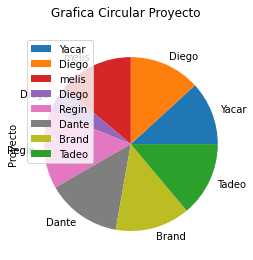

In [ ]:
g4 = Datos.iloc[:, 2:3].plot.pie(subplots=True,title="Grafica Circular Proyecto")
fig = g4[0].get_figure()

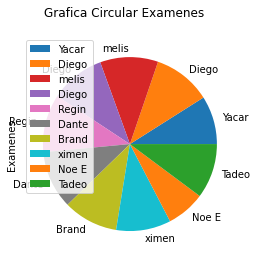

In [ ]:
###Grafica Circular 2 = Examenes
g5 = Datos.iloc[:, 3:4].plot.pie(subplots=True,title="Grafica Circular Examenes")
fig = g5[0].get_figure()

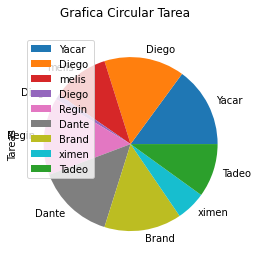

In [ ]:
###Grafica Circular 2 = Examenes
g6 = Datos.iloc[:, 4:5].plot.pie(subplots=True,title="Grafica Circular Tarea")
fig = g6[0].get_figure()

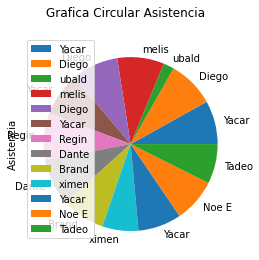

In [ ]:
###Grafica Circular 2 = Examenes
g7 = Datos.iloc[:, 5:6].plot.pie(subplots=True,title="Grafica Circular Asistencia")
fig = g7[0].get_figure()